In [1]:
import keras
# from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

2024-12-30 22:02:15.317671: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# from keras import backend as K

# K.tensorflow_backend._get_available_gpus()

import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
gpus

2024-12-30 22:02:27.705730: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-12-30 22:02:27.724191: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-12-30 22:02:28.330267: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: NVIDIA A100-SXM4-80GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 79.14GiB deviceMemoryBandwidth: 1.85TiB/s
2024-12-30 22:02:28.330357: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-12-30 22:02:28.559097: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-12-30 22:02:28.559164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
TRAINING_FILE = "image_tagging/train.csv"
TRAINING_IMAGES = "/blue/rcstudents/smaley/pokegan/customsprites/blk_bg/input"
IMAGE_SIZE = (256,256,3)

In [4]:
train = pd.read_csv(TRAINING_FILE, nrows=10000) # set limit, delete "nrows" to undo
train.drop(['Name'],axis=1,inplace=True)
train.head()

,Key,Type,normal,fire,water,grass,electric,ice,fighting,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
0,110.95,"poison, ground",0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,155.408,"fire, fairy",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,360.381,"grass, psychic",0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,6.142e,"fire, flying",0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,289.175,"bug, fairy",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [5]:
train.columns

Index(['Key', 'Type', 'normal', 'fire', 'water', 'grass', 'electric', 'ice',
       'fighting', 'poison', 'ground', 'flying', 'psychic', 'bug', 'rock',
       'ghost', 'dragon', 'dark', 'steel', 'fairy'],
      dtype='object')

In [6]:
train_images = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img(f"{TRAINING_IMAGES}/{train.at[i, 'Key']}.png",target_size=IMAGE_SIZE)
    img = image.img_to_array(img)
    img = img/255
    train_images.append(img)
X = np.array(train_images)

100%|██████████| 10000/10000 [00:21<00:00, 456.78it/s]


In [7]:
X.shape

(10000, 256, 256, 3)

In [8]:
y = np.array(train.drop(['Key', 'Type'],axis=1))
y.shape

(10000, 18)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [10]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=IMAGE_SIZE))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='sigmoid'))

2024-12-30 22:02:56.763072: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-30 22:02:56.780073: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-12-30 22:02:56.796009: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: NVIDIA A100-SXM4-80GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 79.14GiB deviceMemoryBandwidth: 1.85TiB/s
2024-12-30 22:02:56.796039: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-12-30 22:02:56.796067: I tensorflow/stream_executor/platform/defaul

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 64)        5

In [12]:
# # Recompile with a lower learning rate
# model.compile(optimizer=Adam(learning_rate=1e-5), 
#               loss='binary_crossentropy', 
#               metrics=['accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=2)])

In [13]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

2024-12-30 22:04:28.654716: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-12-30 22:04:28.904286: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2245635000 Hz


Epoch 1/10


2024-12-30 22:04:30.409914: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-12-30 22:04:31.359026: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2024-12-30 22:10:17.647061: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2024-12-30 22:10:17.920128: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


141/141 [==============================] - 410s 230ms/step - loss: 5.6256 - accuracy: 0.1631 - val_loss: 5.6098 - val_accuracy: 0.1410
Epoch 2/10
141/141 [==============================] - 3s 21ms/step - loss: 18.4221 - accuracy: 0.1261 - val_loss: 5.5846 - val_accuracy: 0.0350
Epoch 3/10
141/141 [==============================] - 3s 21ms/step - loss: 5.6030 - accuracy: 0.0618 - val_loss: 5.6439 - val_accuracy: 0.0350
Epoch 4/10
141/141 [==============================] - 3s 21ms/step - loss: 5.7687 - accuracy: 0.0988 - val_loss: 5.7702 - val_accuracy: 0.0490
Epoch 5/10
141/141 [==============================] - 3s 21ms/step - loss: 6.0583 - accuracy: 0.1045 - val_loss: 5.9343 - val_accuracy: 0.2170
Epoch 6/10
141/141 [==============================] - 3s 22ms/step - loss: 6.4234 - accuracy: 0.1118 - val_loss: 6.1404 - val_accuracy: 0.2170
Epoch 7/10
141/141 [==============================] - 3s 21ms/step - loss: 6.9218 - accuracy: 0.0906 - val_loss: 6.3617 - val_accuracy: 0.2170
Epoch 

In [15]:
model.save('tp_3_30_epoch_256x256.keras')

In [16]:
import csv

file_path = "image_tagging/all_pokemon_to_type.csv"
pokedex = {}

with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        key = row['Key']
        value = {col: row[col] for col in row if col != 'Key'}
        pokedex[key] = value

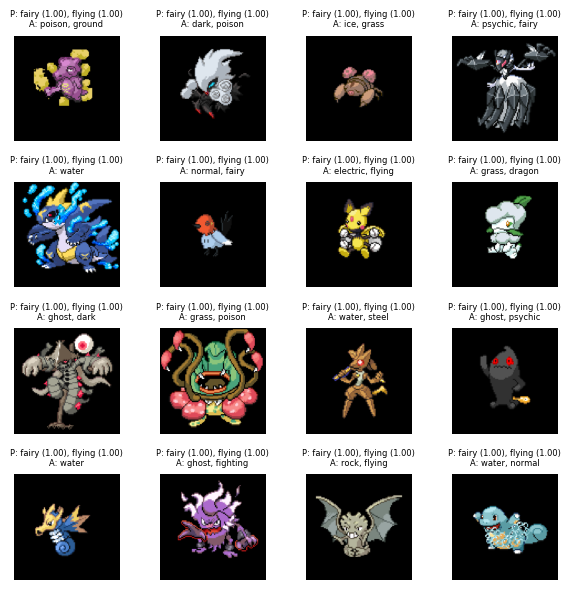

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Constants
GRID_SIZE = 4  # 8x8 grid
OUTPUT_FILE = "predictions_grid.png"  # Output file name

# Variables
count = 0
fig, axes = plt.subplots(GRID_SIZE, GRID_SIZE, figsize=(6, 6))
axes = axes.flatten()

# Iterate through the dataset
for idx, file_name in enumerate(os.listdir(TRAINING_IMAGES)):
    if count >= GRID_SIZE * GRID_SIZE:  # Limit to 64 images
        break
    
    # Load and preprocess the image
    img_path = os.path.join(TRAINING_IMAGES, file_name)
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img) / 255.0  # Normalize
    classes = np.array(train.columns[2:])
    
    # Make predictions
    proba = model.predict(img_array.reshape(1,256,256,3))
    top_2 = np.argsort(proba[0])[:-3:-1]  # Get top 2 predictions
    top_2_predictions = [f"{classes[i]} ({proba[0][i]:.2f})" for i in top_2]
    
    # Get ground truth
    ground_truth = pokedex[file_name[:-4]]["Type"]
    
    # Plot image in grid
    axes[idx].imshow(img)
    axes[idx].axis('off')  # Turn off axis
    axes[idx].set_title(f"P: {', '.join(top_2_predictions)}\nA: {ground_truth}", fontsize=6)
    
    count += 1

# Adjust layout and save the grid
plt.tight_layout()
# plt.savefig(OUTPUT_FILE, dpi=300)
plt.show()